# DSC-410 Predictive Analytics Term Project - Daniel Meier

# Term Project Milestone 2

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib
%matplotlib inline
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport

In [7]:
bullying_data = pd.read_csv('Bullying_2018.csv', sep=";")

In [8]:
bullying_data.head(15)

record Bullied_on_school_property_in_past_12_months  \
0        1                                          Yes   
1        2                                           No   
2        3                                           No   
3        4                                           No   
4        5                                           No   
5        6                                           No   
6        7                                           No   
7        8                                           No   
8        9                                           No   
9       10                                          Yes   
10      11                                           No   
11      12                                          Yes   
12      13                                           No   
13      14                                           No   
14      15                                           No   

   Bullied_not_on_school_property_in_past_12_months  \
0                                               Yes   
1                                                No   
2                                                No   
3                                                No   
4                                                No   
5                                                No   
6                                                No   
7                                                No   
8                                                No   
9                                                No   
10                                               No   
11                                              Yes   
12                                               No   
13                                               No   
14                                               No   

   Cyber_bullied_in_past_12_months    Custom_Age     Sex Physically_attacked  \
0                                   13 years old  Female             0 times   
1                               No  13 years old  Female             0 times   
2                               No  14 years old    Male             0 times   
3                               No  16 years old    Male             0 times   
4                               No  13 years old  Female             0 times   
5                               No  13 years old    Male             0 times   
6                               No  14 years old  Female              1 time   
7                               No  12 years old  Female             0 times   
8                               No  13 years old    Male              1 time   
9                               No  14 years old  Female             0 times   
10                              No  15 years old    Male             0 times   
11                             Yes  13 years old  Female    12 or more times   
12                              No  13 years old  Female             0 times   
13                              No  14 years old  Female             0 times   
14                              No  14 years old  Female             0 times   

   Physical_fighting       Felt_lonely Close_friends  \
0            0 times            Always             2   
1            0 times             Never     3 or more   
2            0 times             Never     3 or more   
3       2 or 3 times             Never     3 or more   
4            0 times            Rarely     3 or more   
5             1 time             Never     3 or more   
6            0 times         Sometimes     3 or more   
7            0 times            Rarely     3 or more   
8       2 or 3 times             Never     3 or more   
9            0 times            Always             0   
10            1 time             Never     3 or more   
11            1 time         Sometimes     3 or more   
12           0 times         Sometimes     3 or more   
13           0 times            Rarely     3 or more   
14           0 times  Most of the time     3 or more   



## Types of variables in the dataset

In [9]:
bullying_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19074 entries, 0 to 19073
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            19074 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      19074 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  19074 non-null  object
 3   Cyber_bullied_in_past_12_months                   19074 non-null  object
 4   Custom_Age                                        19074 non-null  object
 5   Sex                                               19074 non-null  object
 6   Physically_attacked                               19074 non-null  object
 7   Physical_fighting                                 19074 non-null  object
 8   Felt_lonely                                       19073 non-null  object
 9   Close_friends               

## Profiling the raw data

In [10]:
ProfileReport(bullying_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There are mostly categorical variables in this dataset. Some are "yes" or "no" answers, some are a range of answers from "never" to "always", some involve ranges of numbers, like age or the number of days missing school. It does appear there are missing values (questions that were not answered in the survey), some columns having far greater amounts than others, specifically the three questions involving weight. These columns may need to be dropped considering the large amount of unanswered questions. The target variable in my estimation will be the column regarding being bullied on school property in the past 12 months and further exploring the data to determine which features would be best to predict that value.

There are a few columns that are redundant and can be removed (Missing school is one, and there are two columns around feeling lonely). I am also going to remove the physical fighting column, as I am more interested in students reporting on whether or not they were physically attacked. This seems more relevant to the topic of bullying. Physically fighting does not indicate to me that a student was bullied. Encoding will also need to occur in order to utilize the data for feature engineering and use in future models that are selected.

In [11]:
# Dropping the record column as it is not needed. Also dropping the "Most_of_the_time_or_always_felt_lonely", the
# "Missed_classes_or_school_without_permission" and the "Bullied_not_on_school_property_in_past_12_months" column as it is
# captured twice in the data or asked in a different way, so only one column is needed.
# I am also dropping the categories around weight due to the large number of unanswered.

bullying_data = bullying_data.drop(['record', 'Most_of_the_time_or_always_felt_lonely',
                                    'Missed_classes_or_school_without_permission', "Bullied_not_on_school_property_in_past_12_months",
                                    'Were_obese', 'Were_underweight', 'Were_overweight', 'Physical_fighting'], axis=1)
bullying_data.head(10)

Bullied_on_school_property_in_past_12_months  \
0                                          Yes   
1                                           No   
2                                           No   
3                                           No   
4                                           No   
5                                           No   
6                                           No   
7                                           No   
8                                           No   
9                                          Yes   

  Cyber_bullied_in_past_12_months    Custom_Age     Sex Physically_attacked  \
0                                  13 years old  Female             0 times   
1                              No  13 years old  Female             0 times   
2                              No  14 years old    Male             0 times   
3                              No  16 years old    Male             0 times   
4                              No  13 years old  Female             0 times   
5                              No  13 years old    Male             0 times   
6                              No  14 years old  Female              1 time   
7                              No  12 years old  Female             0 times   
8                              No  13 years old    Male              1 time   
9                              No  14 years old  Female             0 times   

  Felt_lonely Close_friends Miss_school_no_permission  \
0      Always             2           10 or more days   
1       Never     3 or more                    0 days   
2       Never     3 or more                    0 days   
3       Never     3 or more                    0 days   
4      Rarely     3 or more                    0 days   
5       Never     3 or more                    0 days   
6   Sometimes     3 or more                    0 days   
7      Rarely     3 or more                    0 days   
8       Never     3 or more               6 to 9 days   
9      Always             0                    0 days   

  Other_students_kind_and_helpful Parents_understand_problems  
0                           Never                      Always  
1                       Sometimes                      Always  
2                       Sometimes                      Always  
3                       Sometimes                              
4                Most of the time            Most of the time  
5                Most of the time                      Always  
6                Most of the time                      Always  
7                Most of the time                       Never  
8                Most of the time            Most of the time  
9                       Sometimes                       Never

In [12]:
# I am renaming several columns to make them more readable by shortening them

bullying_data.rename(columns={'Bullied_on_school_property_in_past_12_months': 'Bullied_At_School_12_mon',
                              'Cyber_bullied_in_past_12_months': 'Cyber_Bullied_12_mon',
                              'Custom_Age': 'Age',
                              'Parents_understand_problems': "Understanding_Parents"}, inplace=True)

In [13]:
# Verifying that columns were renamed correctly

bullying_data.columns

Index(['Bullied_At_School_12_mon', 'Cyber_Bullied_12_mon', 'Age', 'Sex',
       'Physically_attacked', 'Felt_lonely', 'Close_friends',
       'Miss_school_no_permission', 'Other_students_kind_and_helpful',
       'Understanding_Parents'],
      dtype='object')

In [14]:
# This is striping all characters off so there are only number values left in each column

bullying_data['Age'] = bullying_data['Age'].str.extract('(\d+)')
bullying_data['Close_friends'] = bullying_data['Close_friends'].str.extract('(\d+)')

In [15]:
#Converting objects to float so they can be converted to numerical categories

bullying_data = bullying_data.astype({'Age': float, 'Close_friends': float})

In [16]:
# I am converting the missing values into NaN values and then removing them

bullying_data = bullying_data.replace(r'^\s*$', np.nan, regex=True)
bullying_data = bullying_data.dropna()

In [17]:
bullying_data.head(15)

Bullied_At_School_12_mon Cyber_Bullied_12_mon   Age     Sex  \
1                        No                   No  13.0  Female   
2                        No                   No  14.0    Male   
4                        No                   No  13.0  Female   
5                        No                   No  13.0    Male   
6                        No                   No  14.0  Female   
7                        No                   No  12.0  Female   
8                        No                   No  13.0    Male   
9                       Yes                   No  14.0  Female   
10                       No                   No  15.0    Male   
11                      Yes                  Yes  13.0  Female   
12                       No                   No  13.0  Female   
15                       No                   No  13.0  Female   
16                       No                   No  11.0    Male   
18                      Yes                  Yes  14.0  Female   
19                       No                   No  13.0    Male   

   Physically_attacked Felt_lonely  Close_friends Miss_school_no_permission  \
1              0 times       Never            3.0                    0 days   
2              0 times       Never            3.0                    0 days   
4              0 times      Rarely            3.0                    0 days   
5              0 times       Never            3.0                    0 days   
6               1 time   Sometimes            3.0                    0 days   
7              0 times      Rarely            3.0                    0 days   
8               1 time       Never            3.0               6 to 9 days   
9              0 times      Always            0.0                    0 days   
10             0 times       Never            3.0               3 to 5 days   
11    12 or more times   Sometimes            3.0                    0 days   
12             0 times   Sometimes            3.0                    0 days   
15             0 times      Always            3.0                    0 days   
16             0 times       Never            3.0                    0 days   
18             0 times      Rarely            3.0                    0 days   
19             0 times       Never            3.0                    0 days   

   Other_students_kind_and_helpful Understanding_Parents  
1                        Sometimes                Always  
2                        Sometimes                Always  
4                 Most of the time      Most of the time  
5                 Most of the time                Always  
6                 Most of the time                Always  
7                 Most of the time                 Never  
8                 Most of the time      Most of the time  
9                        Sometimes                 Never  
10                Most of the time                Always  
11                           Never                Always  
12                       Sometimes                 Never  
15                       Sometimes             Sometimes  
16                          Always                 Never  
18                          Rarely      Most of the time  
19                           Never                 Never

In [18]:
bullying_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17061 entries, 1 to 19072
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bullied_At_School_12_mon         17061 non-null  object 
 1   Cyber_Bullied_12_mon             17061 non-null  object 
 2   Age                              17061 non-null  float64
 3   Sex                              17061 non-null  object 
 4   Physically_attacked              17061 non-null  object 
 5   Felt_lonely                      17061 non-null  object 
 6   Close_friends                    17061 non-null  float64
 7   Miss_school_no_permission        17061 non-null  object 
 8   Other_students_kind_and_helpful  17061 non-null  object 
 9   Understanding_Parents            17061 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.4+ MB


In [19]:
# Breaking up features into categorical to do further EDA

numerical_features = bullying_data[['Age', 'Close_friends']]

categorical_features = bullying_data[['Miss_school_no_permission', 'Bullied_At_School_12_mon', 'Cyber_Bullied_12_mon',
                                      'Physically_attacked', 'Sex', 'Felt_lonely', 'Other_students_kind_and_helpful',
                                      'Understanding_Parents']]

## Descriptive Statistics

In [20]:
# Getting descriptive statistics on the numerical features

numerical_features.describe()

Age  Close_friends
count  17061.000000   17061.000000
mean      14.871872       2.504484
std        1.306713       0.869198
min       11.000000       0.000000
25%       14.000000       2.000000
50%       15.000000       3.000000
75%       16.000000       3.000000
max       18.000000       3.000000

Based on these statistics, a couple of things that I noted was that the average number of close friends reported in this survey data was 2.5. The vast majority of answers in this data, based on the Pandas Profiling done previously, was either 2 friends or 3 or more friends, so this statistic makes sense.  

## Visualizations of the data

Bullied_At_School_12_mon
No     13338
Yes     3723
Name: count, dtype: int64


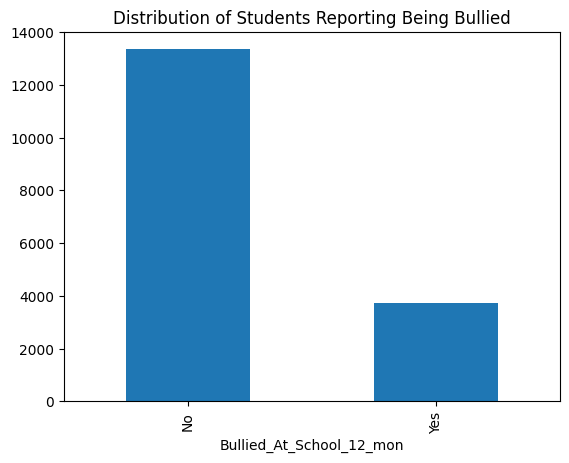

In [21]:
bullied_feat = categorical_features['Bullied_At_School_12_mon']
bull_count = bullied_feat.value_counts()
print(bull_count)
bull_count.plot(kind='bar', title='Distribution of Students Reporting Being Bullied');

In [22]:
pd.crosstab(bullying_data['Bullied_At_School_12_mon'], bullying_data['Other_students_kind_and_helpful'], normalize='columns')

Other_students_kind_and_helpful    Always  Most of the time     Never  \
Bullied_At_School_12_mon                                                
No                               0.850804          0.821823  0.697398   
Yes                              0.149196          0.178177  0.302602   

Other_students_kind_and_helpful    Rarely  Sometimes  
Bullied_At_School_12_mon                              
No                               0.712602    0.76401  
Yes                              0.287398    0.23599

This demonstrates that the less helpful other students are reported to be, the greater percentage of students report being bullied.

## EDA on the Cyber Bullying data

Cyber_Bullied_12_mon
No     13279
Yes     3782
Name: count, dtype: int64


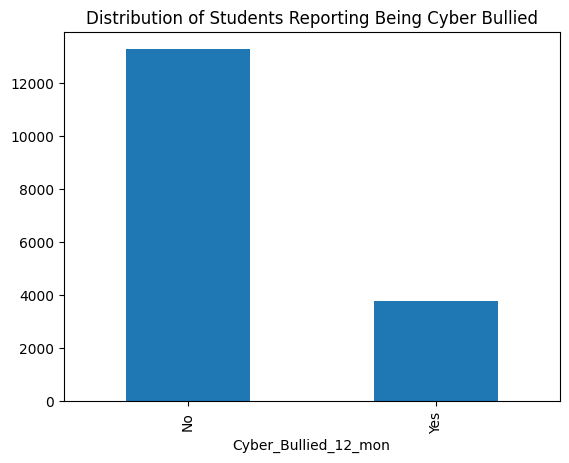

In [23]:
cyber_bullied_feat = categorical_features['Cyber_Bullied_12_mon']
cyber_bull_count = cyber_bullied_feat.value_counts()
print(cyber_bull_count)
cyber_bull_count.plot(kind='bar', title= 'Distribution of Students Reporting Being Cyber Bullied');

Cyber_Bullied_12_mon            No       Yes
Bullied_At_School_12_mon                    
No                        0.845395  0.558435
Yes                       0.154605  0.441565



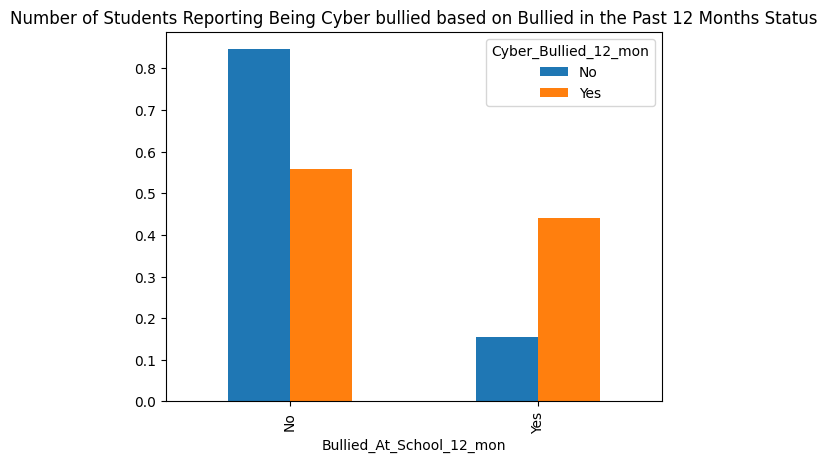

In [24]:
# This is normalizing the data to get the percentage of answers in each column

cyber_bullying_ct = pd.crosstab(bullying_data['Bullied_At_School_12_mon'], bullying_data['Cyber_Bullied_12_mon'], normalize='columns')
print(cyber_bullying_ct)
print()
cyber_bullying_ct.plot.bar(title='Number of Students Reporting Being Cyber bullied based on Bullied in the Past 12 Months Status');

There appears that if someone reports that they were cyber bullied in the last 12 months, it is more likely that they were bullied at school in the past 12 months.

## EDA on the Understanding Parents data

Understanding_Parents
Always              4080
Never               3880
Rarely              3218
Most of the time    2981
Sometimes           2902
Name: count, dtype: int64


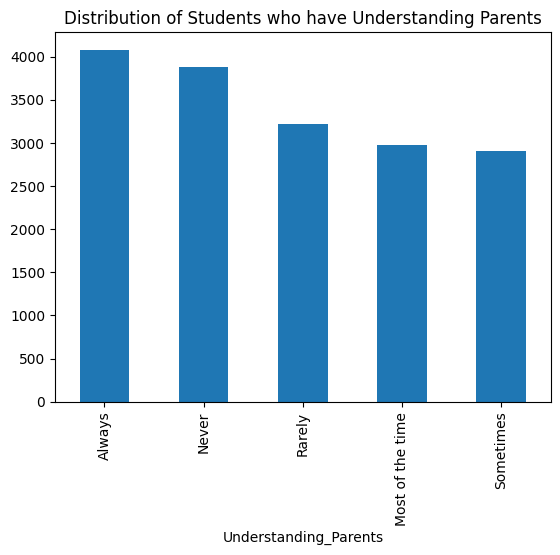

In [25]:
# Creating a bar chart of the count of answers to the understanding parents question

felt_lonely_feat = categorical_features['Understanding_Parents']
felt_lonely_count = felt_lonely_feat.value_counts()
print(felt_lonely_count)
felt_lonely_count.plot(kind='bar', title= 'Distribution of Students who have Understanding Parents');

Understanding_Parents       Always  Most of the time     Never    Rarely  \
Bullied_At_School_12_mon                                                   
No                        0.830392          0.807112  0.739691  0.760099   
Yes                       0.169608          0.192888  0.260309  0.239901   

Understanding_Parents     Sometimes  
Bullied_At_School_12_mon             
No                         0.767746  
Yes                        0.232254  



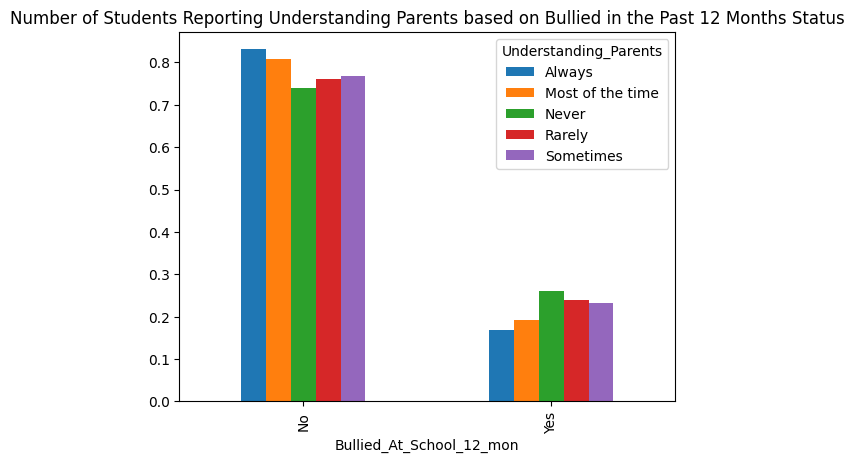

In [26]:
# This is normalizing the data to get the percentage of answers in each column for the ans

under_parent_ct = pd.crosstab(bullying_data['Bullied_At_School_12_mon'], bullying_data['Understanding_Parents'], normalize='columns')
print(under_parent_ct)
print()
under_parent_ct.plot.bar(title='Number of Students Reporting Understanding Parents based on Bullied in the Past 12 Months Status');

It seems predictable to me that those who stated that they never have understanding parents had the highest percentage of answering that they have been bullied in the past 12 months. There appears to be a linear relationship between the two variables.

## EDA on the Felt Lonely data

Felt_lonely                 Always  Most of the time     Never    Rarely  \
Bullied_At_School_12_mon                                                   
No                        0.589496          0.656188  0.868777  0.823744   
Yes                       0.410504          0.343812  0.131223  0.176256   

Felt_lonely               Sometimes  
Bullied_At_School_12_mon             
No                         0.735392  
Yes                        0.264608  



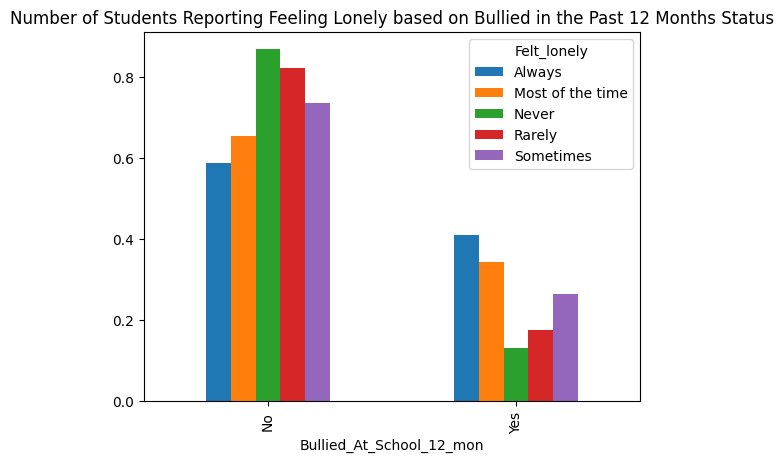

In [27]:
felt_lonely_ct = pd.crosstab(bullying_data['Bullied_At_School_12_mon'], bullying_data['Felt_lonely'], normalize='columns')
print(felt_lonely_ct)
print()
felt_lonely_ct.plot.bar(title='Number of Students Reporting Feeling Lonely based on Bullied in the Past 12 Months Status');

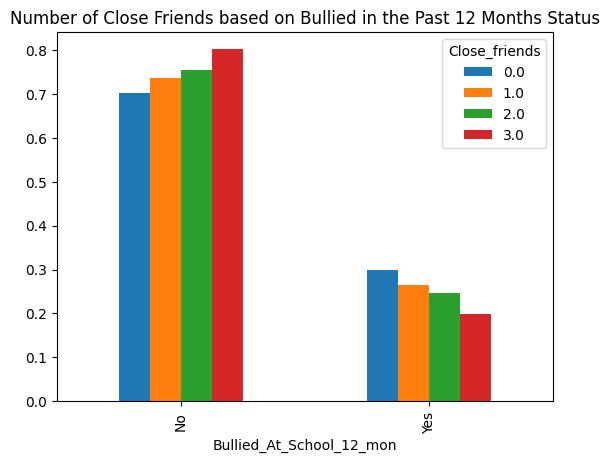

In [28]:
close_friends_ct = pd.crosstab(bullying_data['Bullied_At_School_12_mon'], bullying_data['Close_friends'], normalize='columns')
close_friends_ct
print()
close_friends_ct.plot.bar(title='Number of Close Friends based on Bullied in the Past 12 Months Status');

This cross tab is combining the answers for both being bullied at school and whether or not a student reported feeling lonely and how often and normalizing it based on the columns. To my surprise, when it came to those who reported feeling lonely "Always" or "Most of the time", there was a greater percentage that reported no to being bullied in the last 12 months as opposed to those who responded yes. I would have expected the numbers to be reversed. There appears to be a linear relationship between the two variables.

## EDA on the Close Friends data

Close_friends                  0.0       1.0      2.0       3.0
Bullied_At_School_12_mon                                       
No                        0.700312  0.735479  0.75341  0.800301
Yes                       0.299688  0.264521  0.24659  0.199699



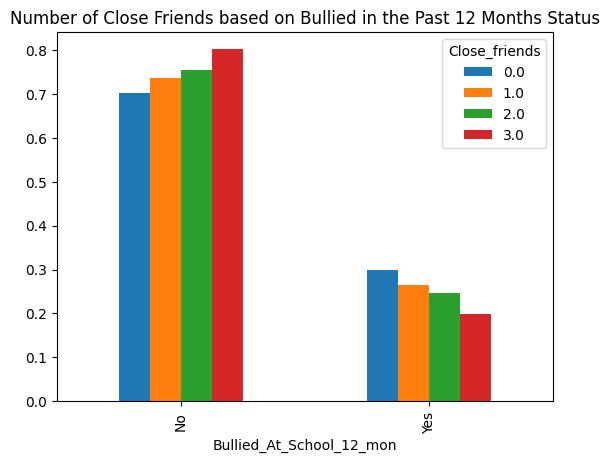

In [29]:
close_friends_ct = pd.crosstab(bullying_data['Bullied_At_School_12_mon'], bullying_data['Close_friends'], normalize='columns')
print(close_friends_ct)
print()
close_friends_ct.plot.bar(title='Number of Close Friends based on Bullied in the Past 12 Months Status');

It was predictable that those who answered 3 on the close friends question had the highest percentage of answering no to being bullied in the last 12 months. The same can be said for those who said they have 0 close friends, that had the highest percentage of those who said yes to being bullied in the last 12 months.


Age
15.0    4139
14.0    3906
16.0    3734
13.0    3119
17.0    2050
18.0      79
12.0      23
11.0      11
Name: count, dtype: int64


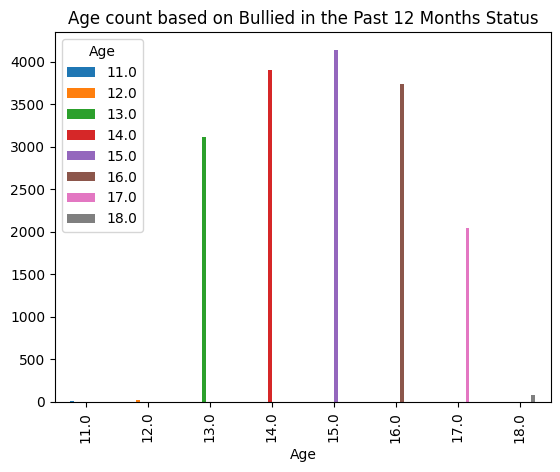

In [30]:
age_ct = pd.crosstab(bullying_data['Age'], bullying_data['Age'])
age_ct.plot.bar(title='Age count based on Bullied in the Past 12 Months Status')
print()
print(bullying_data.Age.value_counts());

Based on these counts, it may be best to do some grouping due to the lower numbers in some categories

## Re-Grouping the age column values

In [31]:
# I am grouping the 11, 12, and 13 age groups due to the low numbers of the 11 and 12
bullying_data.loc[(bullying_data.Age <= 13),  'AgeGroup'] = '13 years or younger'

bullying_data.loc[(bullying_data.Age == 14),  'AgeGroup'] = '14 years old'
bullying_data.loc[(bullying_data.Age == 15),  'AgeGroup'] = '15 years old'
bullying_data.loc[(bullying_data.Age == 16),  'AgeGroup'] = '16 years old'

#I am grouping the 17 and 18 year olds together due to the low count of the 18 year olds
bullying_data.loc[(bullying_data.Age >= 17),  'AgeGroup'] = '17 years or older'

In [32]:
bullying_data.AgeGroup.value_counts()

AgeGroup
15 years old           4139
14 years old           3906
16 years old           3734
13 years or younger    3153
17 years or older      2129
Name: count, dtype: int64

In [33]:
# Dropping the age column now that we have an AgeGroup column

bullying_data.drop('Age', axis='columns', inplace=True)

In [34]:
bullying_data.head(10)

Bullied_At_School_12_mon Cyber_Bullied_12_mon     Sex Physically_attacked  \
1                        No                   No  Female             0 times   
2                        No                   No    Male             0 times   
4                        No                   No  Female             0 times   
5                        No                   No    Male             0 times   
6                        No                   No  Female              1 time   
7                        No                   No  Female             0 times   
8                        No                   No    Male              1 time   
9                       Yes                   No  Female             0 times   
10                       No                   No    Male             0 times   
11                      Yes                  Yes  Female    12 or more times   

   Felt_lonely  Close_friends Miss_school_no_permission  \
1        Never            3.0                    0 days   
2        Never            3.0                    0 days   
4       Rarely            3.0                    0 days   
5        Never            3.0                    0 days   
6    Sometimes            3.0                    0 days   
7       Rarely            3.0                    0 days   
8        Never            3.0               6 to 9 days   
9       Always            0.0                    0 days   
10       Never            3.0               3 to 5 days   
11   Sometimes            3.0                    0 days   

   Other_students_kind_and_helpful Understanding_Parents             AgeGroup  
1                        Sometimes                Always  13 years or younger  
2                        Sometimes                Always         14 years old  
4                 Most of the time      Most of the time  13 years or younger  
5                 Most of the time                Always  13 years or younger  
6                 Most of the time                Always         14 years old  
7                 Most of the time                 Never  13 years or younger  
8                 Most of the time      Most of the time  13 years or younger  
9                        Sometimes                 Never         14 years old  
10                Most of the time                Always         15 years old  
11                           Never                Always  13 years or younger

## Model Expectations and Hypothesis

My initial hypothesis based on the initial data was that being physically attacked, number of close friends, being cyber bullied, whether or not a student reports having understanding parents and whether or not a student felt lonely would be the biggest indicators in whether or not a student reported being bullied in the past 12 months. Based on the EDA of the data, those pieces of data appear to be potential predictive factors with regards to whether or not a student is bullied.

It would appear that being physically attacked has the strongest correlation to this based on the correlation data. It does appear to me that although it isn't as strong, there is some relationship based on the crosstabs that close friends, feeling lonely, understanding parents, whether or not other students are reported as being kind and helpful and whether or not a student reports being cyber bullied in the last 12 months have to whether or not a student reports being bullied in the past 12 months. As the number of friends decreased, the percentage that reported being bullied went up. Those who reported having less understanding parents were more likely to report being bullied in the past 12 months. Those who reported feeling lonely more often had a higher percentage of reporting being bullied.

Based on the EDA, I would suggest using the features close friends, physically attacked, feeling lonely, understanding parents, cyber bullying and other students being kind and helpful as inputs for my model, and the target will be whether or not a student reports being bullied at school in the past 12 months. There are a mixture of numerical and categorical variables at this point, with the target variable being a Yes or No answer. Based on this goal, I believe using a Logistric Regression model would be the best path forward.

# Term Project Milestone 3

In [35]:
# Changing name of bullying_data dataframe to make a copy to work with on feature engineering

feature_data = bullying_data.copy()

In [36]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17061 entries, 1 to 19072
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Bullied_At_School_12_mon         17061 non-null  object 
 1   Cyber_Bullied_12_mon             17061 non-null  object 
 2   Sex                              17061 non-null  object 
 3   Physically_attacked              17061 non-null  object 
 4   Felt_lonely                      17061 non-null  object 
 5   Close_friends                    17061 non-null  float64
 6   Miss_school_no_permission        17061 non-null  object 
 7   Other_students_kind_and_helpful  17061 non-null  object 
 8   Understanding_Parents            17061 non-null  object 
 9   AgeGroup                         17061 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.4+ MB


## Label Encoding Binary Features

In [37]:
# Encoding binary features with Label Encoding either 0 or 1 in place of the current values in the columns. I want there to
# Be more weight to "Yes" being answered in these columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

feature_data["Bullied_At_School_12_mon"] = le.fit_transform(feature_data["Bullied_At_School_12_mon"])
feature_data['Cyber_Bullied_12_mon'] = le.fit_transform(feature_data['Cyber_Bullied_12_mon'])
feature_data.head(15)

Bullied_At_School_12_mon  Cyber_Bullied_12_mon     Sex  \
1                          0                     0  Female   
2                          0                     0    Male   
4                          0                     0  Female   
5                          0                     0    Male   
6                          0                     0  Female   
7                          0                     0  Female   
8                          0                     0    Male   
9                          1                     0  Female   
10                         0                     0    Male   
11                         1                     1  Female   
12                         0                     0  Female   
15                         0                     0  Female   
16                         0                     0    Male   
18                         1                     1  Female   
19                         0                     0    Male   

   Physically_attacked Felt_lonely  Close_friends Miss_school_no_permission  \
1              0 times       Never            3.0                    0 days   
2              0 times       Never            3.0                    0 days   
4              0 times      Rarely            3.0                    0 days   
5              0 times       Never            3.0                    0 days   
6               1 time   Sometimes            3.0                    0 days   
7              0 times      Rarely            3.0                    0 days   
8               1 time       Never            3.0               6 to 9 days   
9              0 times      Always            0.0                    0 days   
10             0 times       Never            3.0               3 to 5 days   
11    12 or more times   Sometimes            3.0                    0 days   
12             0 times   Sometimes            3.0                    0 days   
15             0 times      Always            3.0                    0 days   
16             0 times       Never            3.0                    0 days   
18             0 times      Rarely            3.0                    0 days   
19             0 times       Never            3.0                    0 days   

   Other_students_kind_and_helpful Understanding_Parents             AgeGroup  
1                        Sometimes                Always  13 years or younger  
2                        Sometimes                Always         14 years old  
4                 Most of the time      Most of the time  13 years or younger  
5                 Most of the time                Always  13 years or younger  
6                 Most of the time                Always         14 years old  
7                 Most of the time                 Never  13 years or younger  
8                 Most of the time      Most of the time  13 years or younger  
9                        Sometimes                 Never         14 years old  
10                Most of the time                Always         15 years old  
11                           Never                Always  13 years or younger  
12                       Sometimes                 Never  13 years or younger  
15                       Sometimes             Sometimes  13 years or younger  
16                          Always                 Never  13 years or younger  
18                          Rarely      Most of the time         14 years old  
19                           Never                 Never  13 years or younger

## One-Hot Encoding Sex Column

In [38]:
# I am going to One-Hot Encode the Sex column as there is no order to Male or Female, and one is not more important than the
# Other, so One-Hot Encoding is the best route to go for this field
columns = ['Sex']

feature_data = pd.get_dummies(feature_data, columns=columns, dtype=int)

In [39]:
feature_data.head(10)

Bullied_At_School_12_mon  Cyber_Bullied_12_mon Physically_attacked  \
1                          0                     0             0 times   
2                          0                     0             0 times   
4                          0                     0             0 times   
5                          0                     0             0 times   
6                          0                     0              1 time   
7                          0                     0             0 times   
8                          0                     0              1 time   
9                          1                     0             0 times   
10                         0                     0             0 times   
11                         1                     1    12 or more times   

   Felt_lonely  Close_friends Miss_school_no_permission  \
1        Never            3.0                    0 days   
2        Never            3.0                    0 days   
4       Rarely            3.0                    0 days   
5        Never            3.0                    0 days   
6    Sometimes            3.0                    0 days   
7       Rarely            3.0                    0 days   
8        Never            3.0               6 to 9 days   
9       Always            0.0                    0 days   
10       Never            3.0               3 to 5 days   
11   Sometimes            3.0                    0 days   

   Other_students_kind_and_helpful Understanding_Parents             AgeGroup  \
1                        Sometimes                Always  13 years or younger   
2                        Sometimes                Always         14 years old   
4                 Most of the time      Most of the time  13 years or younger   
5                 Most of the time                Always  13 years or younger   
6                 Most of the time                Always         14 years old   
7                 Most of the time                 Never  13 years or younger   
8                 Most of the time      Most of the time  13 years or younger   
9                        Sometimes                 Never         14 years old   
10                Most of the time                Always         15 years old   
11                           Never                Always  13 years or younger   

    Sex_Female  Sex_Male  
1            1         0  
2            0         1  
4            1         0  
5            0         1  
6            1         0  
7            1         0  
8            0         1  
9            1         0  
10           0         1  
11           1         0

## Ordinal Encoding

### Felt_lonely column

In [40]:
# Ordinal encoding the Felt_Lonely, Physically_Attacked, Other_students_kind_and_helpful Understanding_Parents and
# Miss_school_no_permission columns These have an order to the way they are answered (for ex. Never, Rarely, Sometimes,
# Always have an order to them)

import category_encoders
from category_encoders import OrdinalEncoder

# Starting with the felt lonely column values to know which values need to be encoded

feature_data.Felt_lonely.value_counts()

Felt_lonely
Never               5243
Sometimes           4501
Rarely              4380
Most of the time    2004
Always               933
Name: count, dtype: int64

In [41]:
# This is mapping the order that the Ordinal Encoder should encode each value in this column

ordinal_mapping_felt_lonely = [{'col': 'Felt_lonely', "mapping":{"Never":0, "Rarely":1, "Sometimes":2, "Most of the time":3,
                                                                 "Always":4}}]

# This is applying the mapping to an instance of OrdinalEncoder

ord_enc_lonely = OrdinalEncoder(mapping=ordinal_mapping_felt_lonely)

#This is applying the mapping by fitting and transforming the data to this column

feature_data.Felt_lonely = ord_enc_lonely.fit_transform(feature_data.Felt_lonely)

# Verifying the changes were applied correctly

feature_data.Felt_lonely.value_counts()

Felt_lonely
0    5243
2    4501
1    4380
3    2004
4     933
Name: count, dtype: int64

### Physically_attacked column

In [42]:
# Next, we will ordinally encode the Physically_Attacked column by first checking the values in that column

feature_data.Physically_attacked.value_counts()

Physically_attacked
0 times             14216
1 time               1515
2 or 3 times          725
12 or more times      242
4 or 5 times          196
6 or 7 times           73
8 or 9 times           60
10 or 11 times         34
Name: count, dtype: int64

In [43]:
ordinal_mapping_physically_attacked = [{'col': 'Physically_attacked', "mapping":{"0 times":0, "1 time":1, "2 or 3 times":2,
                                                                                 "4 or 5 times":3, "6 or 7 times":4,
                                                                                 "8 or 9 times":5, "10 or 11 times":6,
                                                                                 "12 or more times": 7}}]

# This is applying the mapping to an instance of OrdinalEncoder

ord_enc_attacked = OrdinalEncoder(mapping=ordinal_mapping_physically_attacked)

#This is applying the mapping by fitting and transforming the data to this column

feature_data.Physically_attacked = ord_enc_attacked.fit_transform(feature_data.Physically_attacked)

# Verifying the changes were applied correctly

feature_data.Physically_attacked.value_counts()

Physically_attacked
0    14216
1     1515
2      725
7      242
3      196
4       73
5       60
6       34
Name: count, dtype: int64

### Other_students_kind_and_helpful column

In [44]:
feature_data.Other_students_kind_and_helpful.value_counts()

Other_students_kind_and_helpful
Most of the time    5068
Sometimes           4229
Rarely              3309
Always              3110
Never               1345
Name: count, dtype: int64

In [45]:
# This is mapping the order that the Ordinal Encoder should encode each value in this column

ordinal_mapping_students_helpful = [{'col': 'Other_students_kind_and_helpful', "mapping":{"Never":0, "Rarely":1, "Sometimes":2,
                                                                                          "Most of the time":3, "Always":4}}]

# This is applying the mapping to an instance of OrdinalEncoder

ord_enc_students_helpful = OrdinalEncoder(mapping=ordinal_mapping_students_helpful)

#This is applying the mapping by fitting and transforming the data to this column

feature_data.Other_students_kind_and_helpful = ord_enc_students_helpful.fit_transform(feature_data.Other_students_kind_and_helpful)

# Verifying the changes were applied correctly

feature_data.Other_students_kind_and_helpful.value_counts()

Other_students_kind_and_helpful
3    5068
2    4229
1    3309
4    3110
0    1345
Name: count, dtype: int64

### Understanding_parents column

In [46]:
feature_data.Understanding_Parents.value_counts()

Understanding_Parents
Always              4080
Never               3880
Rarely              3218
Most of the time    2981
Sometimes           2902
Name: count, dtype: int64

In [47]:
# This is mapping the order that the Ordinal Encoder should encode each value in this column

ordinal_mapping_parents = [{'col': 'Understanding_Parents', "mapping":{"Never":0, "Rarely":1, "Sometimes":2,
                                                                       "Most of the time":3, "Always":4}}]

# This is applying the mapping to an instance of OrdinalEncoder

ord_enc_parents = OrdinalEncoder(mapping=ordinal_mapping_parents)

#This is applying the mapping by fitting and transforming the data to this column

feature_data.Understanding_Parents = ord_enc_parents.fit_transform(feature_data.Understanding_Parents)

# Verifying the changes were applied correctly

feature_data.Understanding_Parents.value_counts()

Understanding_Parents
4    4080
0    3880
1    3218
3    2981
2    2902
Name: count, dtype: int64

### Miss_school_no_permission column

In [48]:
feature_data.Miss_school_no_permission.value_counts()

Miss_school_no_permission
0 days             12129
1 or 2 days         2936
3 to 5 days         1137
10 or more days      455
6 to 9 days          404
Name: count, dtype: int64

In [49]:
ordinal_mapping_missed_school = [{'col': 'Miss_school_no_permission', "mapping":{"0 days":0, "1 or 2 days":1, "3 to 5 days":2,
                                                                                 "6 to 9 days":3, "10 or more days":4,}}]

# This is applying the mapping to an instance of OrdinalEncoder

ord_enc_missed_school = OrdinalEncoder(mapping=ordinal_mapping_missed_school)

#This is applying the mapping by fitting and transforming the data to this column

feature_data.Miss_school_no_permission = ord_enc_missed_school.fit_transform(feature_data.Miss_school_no_permission)

# Verifying the changes were applied correctly

feature_data.Miss_school_no_permission.value_counts()

Miss_school_no_permission
0    12129
1     2936
2     1137
4      455
3      404
Name: count, dtype: int64

### AgeGroup column

In [50]:
feature_data.AgeGroup.value_counts()

AgeGroup
15 years old           4139
14 years old           3906
16 years old           3734
13 years or younger    3153
17 years or older      2129
Name: count, dtype: int64

In [51]:
# This is mapping the order that the Ordinal Encoder should encode each value in this column

ordinal_mapping_age = [{'col': 'AgeGroup', "mapping":{"13 years or younger":0, "14 years old":1, "15 years old":2,
                                                      "16 years old":3, "17 years or older":4}}]

# This is applying the mapping to an instance of OrdinalEncoder

ord_enc_age = OrdinalEncoder(mapping=ordinal_mapping_age)

#This is applying the mapping by fitting and transforming the data to this column

feature_data.AgeGroup = ord_enc_age.fit_transform(feature_data.AgeGroup)

# Verifying the changes were applied correctly

feature_data.AgeGroup.value_counts()

AgeGroup
2    4139
1    3906
3    3734
0    3153
4    2129
Name: count, dtype: int64

### Close_friends column

In [52]:
feature_data.Close_friends.value_counts()

Close_friends
3.0    11958
2.0     2713
1.0     1429
0.0      961
Name: count, dtype: int64

Based on how the Close_friends column is currently formatted and the values that are present, there is no need to encode it

In [53]:
# Saving the dataset for future use:

feature_data.to_csv('bullying_data_final.csv', index=False)

# Term Project Milestone 4

## Logistic Regression Model

In [54]:
# I am using Logistic Regression as the model as it can predict a binary categorical target variable.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# These are metrics I will use later to evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, \
                            accuracy_score, roc_auc_score

### First iteration of Logistic Regression with Base Parameters and All Features

In [55]:
# I am initially using all features to see how the model performs

X = feature_data.drop(['Bullied_At_School_12_mon'], axis = 1)
y = feature_data.Bullied_At_School_12_mon

# I am using a bit larger test size than normal (70/30 train/test ratio instead of a standard 80/20 ratio) due to the target classes being imbalanced to see how this impacts
# Model performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Initializing the instance of LogisticRegression, fitting it to the training data, and then using it to make predictions on
# Both the training and test data

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

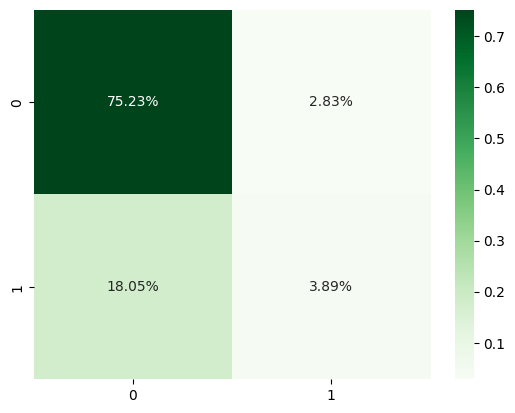

In [57]:
# Confusion matrix to plot number of TP (True Postiives), FP (False Postiives), TN (True Negatives), and FN (False Negatives)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [58]:
"""

    One thing to note- the following code will be utilized many times throughout this notebook,
    it will simply have minor adjustments in naming conventions, but the core of the code will
    be the same.

"""

print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

# This is creating variables for the accuracy score of both the training and testing data, the difference between the two, the
# precision, recall, f1 and roc_auc scores.

train_accuracy_lr_1 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_lr_1 = accuracy_score(y_test, y_pred).round(4)
train_test_1 = train_accuracy_lr_1 - test_accuracy_lr_1
precision_lr_1 = precision_score(y_test, y_pred).round(4)
recall_lr_1 = recall_score(y_test, y_pred).round(4)
f1_lr_1 = f1_score(y_test, y_pred).round(4)
roc_auc_lr_1 = roc_auc_score(y_test, y_pred).round(4)

# This is collecting all of the previous metrics into one variable

lr_1 = [(train_accuracy_lr_1, test_accuracy_lr_1, train_test_1, precision_lr_1, recall_lr_1, f1_lr_1, roc_auc_lr_1)]

# This is creating a dataframe of all of the above metrics using the lr_1 data, creating column headers for each, and
# labeling which iteration of the model this is (All Features, Base Parameters) to help distinguish what iteration of the model
# This scores refer to. This code will be utilized later to create a wholistic Data Frame of all model iteration metrics

lr_1_score = pd.DataFrame(data = lr_1, columns=['Train Accuracy','Test Accuracy','Difference', 'Precision','Recall', 'F1',
                                                "Roc_Auc"])
lr_1_score.insert(0, 'Logistic Regression with:', 'All Features, Base Parameters')
lr_1_score

              precision    recall  f1-score   support

          No       0.81      0.96      0.88      3996
         Yes       0.58      0.18      0.27      1123

    accuracy                           0.79      5119
   macro avg       0.69      0.57      0.57      5119
weighted avg       0.76      0.79      0.74      5119




Logistic Regression with:  Train Accuracy  Test Accuracy  Difference  \
0  All Features, Base Parameters          0.7911         0.7912     -0.0001   

   Precision  Recall      F1  Roc_Auc  
0     0.5785  0.1772  0.2713   0.5705

### Logisitic Regression 1st Iteration Evaluation

- It is evident that this dataset is unbalanced as the "No" class is roughly 80% of the target variable and "Yes" is roughly 20%. The lower precision, recall and f1-score of the "Yes" class shows that it is having a more difficult time predicting that class compared to the "No" class. The weighted average definitely shows there is a significant discrepency from the macro average, especially in the recall and f1 scores. My next step will be to tune the model and adjust the hyperparameters of the next model iteration and see how it performs and potentially make further adjustments from there, depending on the model performance.

### Second Iteration of Logistic Regression with All Features and Tuned Model

In [60]:
# Creating various parameters to feed into GridSearch to find the best combination to feed into the next model iteration

LRparam_grid = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [200, 400, 600, 800, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
}

# This is fitting the training data with the LogisticRegression model and feeding it the parameter grid. It is also doing a CV of 5,
# So it is checking each set of parameters on 5 crossfolds of the training data

LR_search = GridSearchCV(logreg, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.784 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.793 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.791 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=saga;, score=0.787 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=saga;, score=0.791 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=l1, solver=saga;, score=0.793 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=sag;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.797 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.789 total time=   0.2s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.784 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.784 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=0.790 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=0.793 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=0.793 total time=   0.2s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.798 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.784 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.789 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.792 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.794 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.784 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.797 total time=   0.2s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.789 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.792 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.794 total time=   0.2s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.790 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.784 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.798 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.789 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.792 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.794 total time=   0.7s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.784 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.798 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.789 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.792 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.794 total time=   0.6s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 1/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.797 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.794 total time=   0.2s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.784 total time=   0.2s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.797 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.789 total time=   0.2s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.794 total time=   0.2s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.784 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.792 total time=   0.2s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.794 total time=   0.2s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=liblinear;, score=0.784 total time=   0.4s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=liblinear;, score=0.797 total time=   0.3s
[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=liblinear;, score=0.789 total time=   0.4s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 5/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.797 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.784 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.797 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.784 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.784 total time=   0.1s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.797 total time=   0.1s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py"

In [61]:
# This returns the best parameters found by GridSearch, the best accuracy score the model found, and then getting the
# coefficients of each feature to determine how much each feature factors in the model

best_params = LR_search.best_params_
average_score = "{:.3}".format(LR_search.best_score_)
feat_importance = logreg.coef_[0]

# This is creating a dataframe to represent each feature along with its level of importance

feat_imp_col_names = X.columns

feature_imp_df = pd.DataFrame(feat_importance, index=feat_imp_col_names, columns=["Importance"])
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

print(f"Best hyperparameters: {best_params}")
print(f'Mean Accuracy: {average_score}')
print()
feature_imp_df

Best hyperparameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Mean Accuracy: 0.792



Importance
Cyber_Bullied_12_mon               1.247622
Felt_lonely                        0.259253
Physically_attacked                0.223851
Sex_Male                           0.039446
Miss_school_no_permission          0.038828
Understanding_Parents             -0.012356
Sex_Female                        -0.039396
Close_friends                     -0.068159
AgeGroup                          -0.139578
Other_students_kind_and_helpful   -0.154316

### Hyperparameter tuning with GridSearchCV

- I would have expected Physically_attacked to either be #1 or #2 in feature importance, so I was surprised that it ended up being #3. While I am not surprised that Cyber Bullying was #1, I am surprised at how overwhelmingly higher it is than the #2 ranked feature of Feeling Lonely. Adjustment of features will be explored after running the tuned model.

In [62]:
logreg = LogisticRegression(C= 0.01, max_iter= 200, penalty= 'l1', solver= 'liblinear')

logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

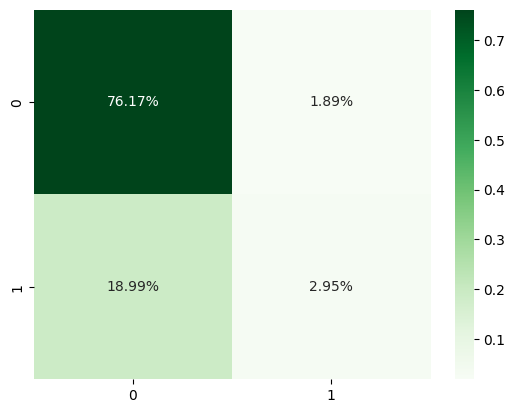

In [63]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [64]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_lr_2 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_lr_2 = accuracy_score(y_test, y_pred).round(4)
train_test_2 = train_accuracy_lr_2 - test_accuracy_lr_2
precision_lr_2 = precision_score(y_test, y_pred).round(4)
recall_lr_2 = recall_score(y_test, y_pred).round(4)
f1_lr_2 = f1_score(y_test, y_pred).round(4)
roc_auc_lr_2 = roc_auc_score(y_test, y_pred).round(4)

lr_2 = [(train_accuracy_lr_2, test_accuracy_lr_2, train_test_2, precision_lr_2, recall_lr_2, f1_lr_2, roc_auc_lr_2)]

lr_2_score = pd.DataFrame(data = lr_2, columns=['Train Accuracy','Test Accuracy', 'Difference', 'Precision','Recall', 'F1', "Roc_Auc"])
lr_2_score.insert(0, 'Logistic Regression with:', 'All Features, Tuned Model')
lr_2_score

              precision    recall  f1-score   support

          No       0.80      0.98      0.88      3996
         Yes       0.61      0.13      0.22      1123

    accuracy                           0.79      5119
   macro avg       0.70      0.56      0.55      5119
weighted avg       0.76      0.79      0.73      5119




Logistic Regression with:  Train Accuracy  Test Accuracy  Difference  \
0  All Features, Tuned Model          0.7905         0.7912     -0.0007   

   Precision  Recall      F1  Roc_Auc  
0     0.6089  0.1345  0.2203   0.5551

### Logistic Regression 2nd Iteration Evaluation

- It would appear that tuning improved the accuracy, precision and f1 scores of the model, but recall and roc_auc dropped. My biggest concern right now is assessing the recall score, as I want to avoid as many false negatives as possible.
</br>
</br>
- For my next iteration, I will utilize feature importance metrics and I am going to drop the two lowest features, which happen to be both features pertaining to the Sex of the student. I don't want to drop too many features as I feel like I could lose too much information, but want to make a targeted adjustment to see how that impacts the model's performance and how that compares to the first iteration which overall is the best performer of the two model iterations so far.

### Third Iteration of Logistic Regression Model, Base Parameters, Bottom 2 Features Removed

In [65]:
X = feature_data.drop(['Bullied_At_School_12_mon', "AgeGroup", "Other_students_kind_and_helpful"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

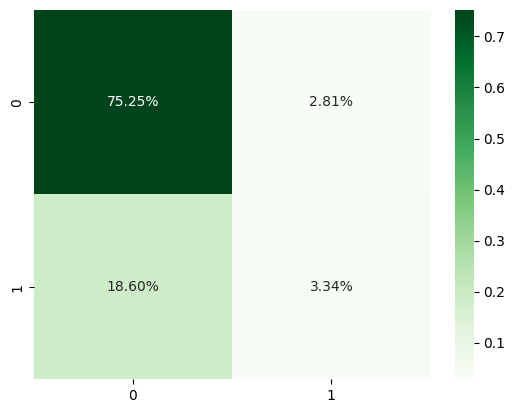

In [66]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [67]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_lr_3 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_lr_3 = accuracy_score(y_test, y_pred).round(4)
train_test_3 = train_accuracy_lr_3 - test_accuracy_lr_3
precision_lr_3 = precision_score(y_test, y_pred).round(4)
recall_lr_3 = recall_score(y_test, y_pred).round(4)
f1_lr_3 = f1_score(y_test, y_pred).round(4)
roc_auc_lr_3 = roc_auc_score(y_test, y_pred).round(4)

lr_3 = [(train_accuracy_lr_3, test_accuracy_lr_3, train_test_3, precision_lr_3, recall_lr_3, f1_lr_3, roc_auc_lr_3)]

lr_3_score = pd.DataFrame(data = lr_3, columns=['Train Accuracy','Test Accuracy','Difference', 'Precision','Recall', 'F1', "Roc_Auc"])
lr_3_score.insert(0, 'Logistic Regression with:', 'Bottom 2 Features Removed, Base Parameters')
lr_3_score

              precision    recall  f1-score   support

          No       0.80      0.96      0.88      3996
         Yes       0.54      0.15      0.24      1123

    accuracy                           0.79      5119
   macro avg       0.67      0.56      0.56      5119
weighted avg       0.75      0.79      0.74      5119




Logistic Regression with:  Train Accuracy  Test Accuracy  \
0  Bottom 2 Features Removed, Base Parameters          0.7892         0.7859   

   Difference  Precision  Recall      F1  Roc_Auc  
0      0.0033     0.5429  0.1523  0.2378   0.5581

### Logistic Regression 3rd Iteration Evaluation

- Compared to the first model iteration, all metrics declined somewhat except precision, which improved slightly. I am going to tune this model and see how that impacts metrics of the model's performance with the bottom 2 features removed based on the feature importance metrics.

### Fourth Iteration of Logistic Regression, Tuned Model, Bottom 2 Features Removed

In [68]:
LR_search_2 = GridSearchCV(logreg, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.788 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.789 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.787 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.789 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.790 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=sag;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, pen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.788 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.794 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.789 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.789 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=liblinear;

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.788 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.788 total time=   0.2s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.794 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.789 total time=   0.2s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.788 total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour


[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.792 total time=   0.2s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.788 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.794 total time=   0.2s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.789 total time=   0.2s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.787 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.786 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinea

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.785 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.792 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.788 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.793 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.788 total time=   0.4s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.785 total time=   0.4s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.792 total time=   0.5s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.788 total time=   0.5s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.793 total time=   0.6s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=sag;, score=0.788 total time=   0.6s
[CV 1/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg;, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.788 total time=   0.2s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.792 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 2/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.785 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.792 total time=   0.2s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 1/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.792 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.788 total time=   0.2s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.794 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.789 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 1/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.785 total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.789 total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.794 total time=   0.1s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.785 total time=   0.4s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.794 total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.785 total time=   0.2s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.792 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.785 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.792 total time=   0.1s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.788 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.794 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.789 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.785 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.792 total time=   0.2s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.788 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.794 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.789 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [69]:
best_params_2 = LR_search_2.best_params_
average_score_2 = "{:.3}".format(LR_search_2.best_score_)

print(f"Best hyperparameters: {best_params_2}")
print(f'Mean Accuracy: {average_score_2}')

Best hyperparameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Mean Accuracy: 0.79


In [70]:
logreg = LogisticRegression(C=0.01, max_iter= 200, penalty= 'l2', solver= 'liblinear')

logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

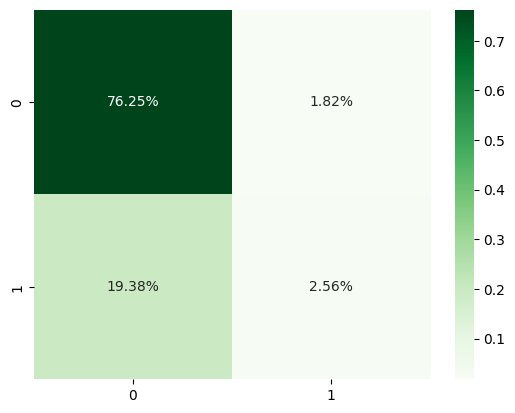

In [71]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [72]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_lr_4 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_lr_4 = accuracy_score(y_test, y_pred).round(4)
train_test_4 = train_accuracy_lr_4 - test_accuracy_lr_4
precision_lr_4 = precision_score(y_test, y_pred).round(4)
recall_lr_4 = recall_score(y_test, y_pred).round(4)
f1_lr_4 = f1_score(y_test, y_pred).round(4)
roc_auc_lr_4 = roc_auc_score(y_test, y_pred).round(4)

lr_4 = [(train_accuracy_lr_4, test_accuracy_lr_4, train_test_4, precision_lr_4, recall_lr_4, f1_lr_4, roc_auc_lr_4)]

lr_4_score = pd.DataFrame(data = lr_4, columns=['Train Accuracy','Test Accuracy','Difference', 'Precision','Recall', 'F1', "Roc_Auc"])
lr_4_score.insert(0, 'Logistic Regression with:', 'Bottom 2 Features Removed, Tuned Model')
lr_4_score

              precision    recall  f1-score   support

          No       0.80      0.98      0.88      3996
         Yes       0.58      0.12      0.19      1123

    accuracy                           0.79      5119
   macro avg       0.69      0.55      0.54      5119
weighted avg       0.75      0.79      0.73      5119




Logistic Regression with:  Train Accuracy  Test Accuracy  \
0  Bottom 2 Features Removed, Tuned Model          0.7896          0.788   

   Difference  Precision  Recall      F1  Roc_Auc  
0      0.0016     0.5848  0.1167  0.1945   0.5467

### Logistic Regression 4th Iteration Evaluation

- It would appear that removing those two features overall hurt the model's performance, so it would appear that those features were helping the model's predictive power. My next step will be to insert back all features as input, and undersample the data in order to bring the target classes in to balance to improve how the model learns.

### Fifth Iteration of Logistic Regression, All Features, Undersampling Dataset

In [73]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

X = feature_data.drop(['Bullied_At_School_12_mon'], axis = 1)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

y_under.value_counts()

Bullied_At_School_12_mon
0    3723
1    3723
Name: count, dtype: int64

In [74]:
# We are now using the new resampled dataset to prepare our next iteration of Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

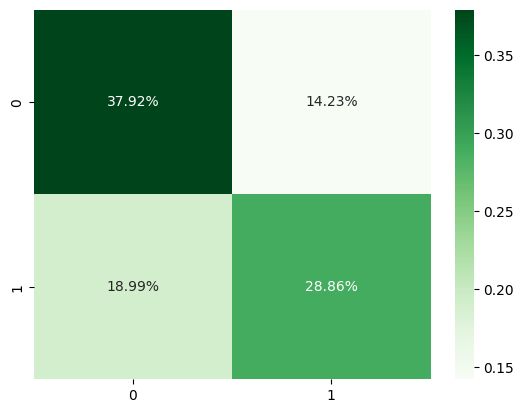

In [76]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [77]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_lr_5 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_lr_5 = accuracy_score(y_test, y_pred).round(4)
train_test_5 = train_accuracy_lr_5 - test_accuracy_lr_5
precision_lr_5 = precision_score(y_test, y_pred).round(4)
recall_lr_5 = recall_score(y_test, y_pred).round(4)
f1_lr_5 = f1_score(y_test, y_pred).round(4)
roc_auc_lr_5 = roc_auc_score(y_test, y_pred).round(4)

lr_5 = [(train_accuracy_lr_5, test_accuracy_lr_5, train_test_5, precision_lr_5, recall_lr_5, f1_lr_5, roc_auc_lr_5)]

lr_5_score = pd.DataFrame(data = lr_5, columns=['Train Accuracy','Test Accuracy','Difference', 'Precision','Recall', 'F1', "Roc_Auc"])
lr_5_score.insert(0, 'Logistic Regression with:', 'All Features, Base Parameters, Undersampling')
lr_5_score

              precision    recall  f1-score   support

          No       0.67      0.73      0.70       777
         Yes       0.67      0.60      0.63       713

    accuracy                           0.67      1490
   macro avg       0.67      0.67      0.67      1490
weighted avg       0.67      0.67      0.67      1490




Logistic Regression with:  Train Accuracy  \
0  All Features, Base Parameters, Undersampling          0.6734   

   Test Accuracy  Difference  Precision  Recall      F1  Roc_Auc  
0         0.6678      0.0056     0.6698  0.6031  0.6347   0.6651

### Logistic Regression 5th Iteration Evaluation

- Although the test accuracy dropped by 12%, the precision improved by nearly 8%, along with recall improving dramatically by 48%, along with f1 and roc_auc improved greatly as well. While the overall accuracy of the model is not where I would like it, my biggest concern is that the recall measures improve, which they did, but not quite as much as I would have liked. I am going to tune the model and see how it performs.

### Sixth Iteration of Logistic Regression, Tuned Model, All Features, Undersampling

In [78]:
LR_search_3 = GridSearchCV(logreg, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penal

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=200, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=lbfgs;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.661 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.668 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.675 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.662 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=liblinear;, score=0.688 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.664 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.672 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.671 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.660 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.683 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.672 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=newton-cg;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=lbfgs;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalt

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=saga;, score=0.690 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.667 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=400, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.672 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=600, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.672 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=saga;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=800, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=lb

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=10

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=1000, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.668 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.687 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.662 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.673 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.668 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.688 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan tota

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=saga;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.672 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=200, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.672 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=newton-cg;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.667 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=lbfgs;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.672 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=saga;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.672 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=400, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.661 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.668 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.687 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.662 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.673 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.668 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.688 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=saga;, score=0.690 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.667 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=600, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, sol

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 3/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=800, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=l1, solver=lbfgs;, score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.672 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[CV 4/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=0.1, max_iter=1000, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 4/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=liblinear;, s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 1/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=none, solver=saga;, score=0.690 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 1/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.667 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=200, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.665 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.667 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=none, solver=newton-cg;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.665 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.667 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=lbfgs;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.665 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.667 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=none, solver=saga;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.665 total time=   0.1s
[CV 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 4/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11


[CV 3/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.667 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 5/5] END C=1, max_iter=600, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.672 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 5/5] END C=1, max_iter=800, penalty=none, solver=newton-cg;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=liblinear;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 2/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.663 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.665 total time=   0.1s
[CV 3/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=1, max_iter=800, penalty=none, solver=sag;, score=0.690 total time=   0.1s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.673 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.666 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.689 total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.664 total time=   0.1s
[CV 2/5] END C=1, max_iter=1000, penalty=l1, solver=saga;, score=0.665 total ti

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.663 total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.665 total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.672 total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=lbfgs;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=saga;,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.667 total time=   0.0s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=saga;, score=0.690 total time=   0.0s
[CV 1/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.663 total time=   0.1s
[CV 2/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.665 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

[CV 3/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.672 total time=   0.1s
[CV 4/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.667 total time=   0.1s
[CV 5/5] END C=1, max_iter=1000, penalty=none, solver=sag;, score=0.690 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local

In [79]:
best_params_3 = LR_search_3.best_params_
average_score_3 = "{:.3}".format(LR_search_3.best_score_)

print(f"Best hyperparameters: {best_params_3}")
print(f'Mean Accuracy: {average_score_3}')

Best hyperparameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean Accuracy: 0.671


In [80]:
logreg = LogisticRegression(C=1, max_iter= 200, penalty= 'l2', solver= 'newton-cg')

logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

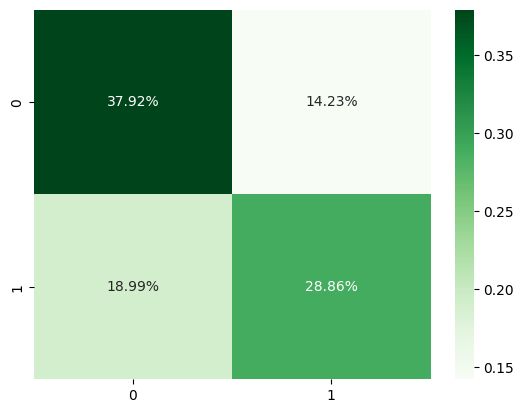

In [81]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [82]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_lr_6 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_lr_6 = accuracy_score(y_test, y_pred).round(4)
train_test_6 = train_accuracy_lr_6 - test_accuracy_lr_6
precision_lr_6 = precision_score(y_test, y_pred).round(4)
recall_lr_6 = recall_score(y_test, y_pred).round(4)
f1_lr_6 = f1_score(y_test, y_pred).round(4)
roc_auc_lr_6 = roc_auc_score(y_test, y_pred).round(4)

lr_6 = [(train_accuracy_lr_6, test_accuracy_lr_6, train_test_6, precision_lr_6, recall_lr_6, f1_lr_6, roc_auc_lr_6)]

lr_6_score = pd.DataFrame(data = lr_6, columns=['Train Accuracy','Test Accuracy','Difference', 'Precision','Recall', 'F1', "Roc_Auc"])
lr_6_score.insert(0, 'Logistic Regression with:', 'All Features, Tuned Model, Undersampling')
lr_6_score

              precision    recall  f1-score   support

          No       0.67      0.73      0.70       777
         Yes       0.67      0.60      0.63       713

    accuracy                           0.67      1490
   macro avg       0.67      0.67      0.67      1490
weighted avg       0.67      0.67      0.67      1490




Logistic Regression with:  Train Accuracy  Test Accuracy  \
0  All Features, Tuned Model, Undersampling          0.6734         0.6678   

   Difference  Precision  Recall      F1  Roc_Auc  
0      0.0056     0.6698  0.6031  0.6347   0.6651

### Logistic Regression 6th Iteration Evaluation

- Adjusting parameters of this model made minimal difference in the model's overall performance. The 5th and 6th iteration of this model are performing about the same.

## Overall Performance Comparison of Logistic Regression

In [83]:
# Creating a dataframe that organizes all of the metrics from each iteration of the Logistics Regression model and sorts by the
# Accuracy score for better visualization

predictions_lr = pd.concat([lr_1_score, lr_2_score, lr_3_score, lr_4_score, lr_5_score, lr_6_score],
                            ignore_index=True, sort=False)

predictions_lr.sort_values(by=['Recall'], ascending=False)

Logistic Regression with:  Train Accuracy  \
4  All Features, Base Parameters, Undersampling          0.6734   
5      All Features, Tuned Model, Undersampling          0.6734   
0                 All Features, Base Parameters          0.7911   
2    Bottom 2 Features Removed, Base Parameters          0.7892   
1                     All Features, Tuned Model          0.7905   
3        Bottom 2 Features Removed, Tuned Model          0.7896   

   Test Accuracy  Difference  Precision  Recall      F1  Roc_Auc  
4         0.6678      0.0056     0.6698  0.6031  0.6347   0.6651  
5         0.6678      0.0056     0.6698  0.6031  0.6347   0.6651  
0         0.7912     -0.0001     0.5785  0.1772  0.2713   0.5705  
2         0.7859      0.0033     0.5429  0.1523  0.2378   0.5581  
1         0.7912     -0.0007     0.6089  0.1345  0.2203   0.5551  
3         0.7880      0.0016     0.5848  0.1167  0.1945   0.5467

## Final Analysis of Logistic Regression

- Overall, the Logistic Regression model appears to be performing okay, but not at the standard I would like. Based on my assessment, the final iteration of Logisitic Regression performed on the under sampled data with a tuned model is the best performer. However, the model is not quite to the level I would ideally like to see. Although it is performing better overall, it still leaves a lot to be desired. Based on this, I am going to move on to trying a different model and perform multiple iterations of a Random Forest Classifier and see how this model performs in comparison. I will do identical iterations of this model and make a decision after assessing that model's performance based on the same metrics.

_____________________________________________________________________________________________

## Random Forest Model

### First Iteration of Random Forest with Base Parameters and All Features as Input

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Starting out using all features to see how the model performs

X = feature_data.drop(['Bullied_At_School_12_mon'], axis = 1)
y = feature_data.Bullied_At_School_12_mon

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Creating an instance of RandomForestClassifier, fitting it to the training data, and creating predictions of both the training
# Data and testing data

rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)

y_train_pred = rf_class.predict(X_train)
y_pred = rf_class.predict(X_test)

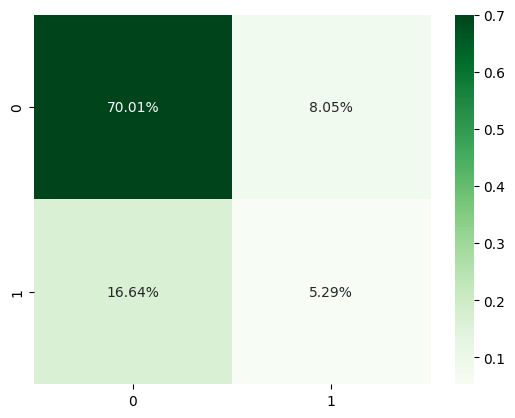

In [86]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [87]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_rf_1 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_rf_1 = accuracy_score(y_test, y_pred).round(4)
train_test_rf_1 = train_accuracy_rf_1 - test_accuracy_rf_1
precision_rf_1 = precision_score(y_test, y_pred).round(4)
recall_rf_1 = recall_score(y_test, y_pred).round(4)
f1_rf_1 = f1_score(y_test, y_pred).round(4)
roc_auc_rf_1 = roc_auc_score(y_test, y_pred).round(4)

rf_1 = [(train_accuracy_rf_1, test_accuracy_rf_1, train_test_rf_1, precision_rf_1, recall_rf_1, f1_rf_1, roc_auc_rf_1)]

rf_1_score = pd.DataFrame(data = rf_1, columns=['Train Accuracy','Test Accuracy', 'Difference','Precision','Recall', 'F1', "Roc_Auc"])
rf_1_score.insert(0, 'Random Forest with:', 'All Features, Base Parameters')
rf_1_score

              precision    recall  f1-score   support

          No       0.81      0.90      0.85      3996
         Yes       0.40      0.24      0.30      1123

    accuracy                           0.75      5119
   macro avg       0.60      0.57      0.58      5119
weighted avg       0.72      0.75      0.73      5119




Random Forest with:  Train Accuracy  Test Accuracy  Difference  \
0  All Features, Base Parameters          0.9247         0.7531      0.1716   

   Precision  Recall      F1  Roc_Auc  
0     0.3968  0.2413  0.3001   0.5691

### Random Forest 1st Iteration Evaluation

- Compared to the best performing Logistic Regression model, this iteration needs improvement. The train and test accuracy have a pretty large discrepency, which indicates that the model is overfitting the data given the test accuracy is much lower than the train. Recall, F1, and roc_auc are all much lower than the best Logistic Regression model. My next step is to tune this model and check evaluation metrics.

### Second Iteration of Random Forest with Tuned Model

In [88]:
# Creating a new parameter list to feed into Grid Search to find the best combination of hyper parameters based on this training
# data

rf_grid_search={'max_depth':[None, 5, 10],
              'n_estimators':[50,100,150],
              'max_features' :['sqrt', 'log2', None],
              'min_samples_leaf':[2, 4, 6],
              'min_samples_split':[2, 4, 6]
           }

rf_grid = GridSearchCV(rf_class, param_grid=rf_grid_search, cv=5, refit = True, verbose = 3, scoring='accuracy').fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.4s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.776 total time=   0.4s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.4s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.781 total time=   0.6s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.778 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.781 total time=   1.2s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;,

In [89]:
rf_best_params = rf_grid.best_params_
rf_best_feat = rf_grid.best_estimator_
rf_feat_importance = rf_best_feat.feature_importances_
rf_average_score = "{:.3}".format(rf_grid.best_score_)
print(f"Best hyperparameters: {rf_best_params}")
print(f'Mean Accuracy: {rf_average_score}')

# This is creating a dataframe that has all of the feature columns and their ranking of importance

feat_imp_col_names = X.columns

feature_imp_df = pd.DataFrame(rf_feat_importance, index=feat_imp_col_names, columns=["Importance"])
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
feature_imp_df

Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 50}
Mean Accuracy: 0.792


Importance
Cyber_Bullied_12_mon               0.472695
Physically_attacked                0.180488
Felt_lonely                        0.179938
Other_students_kind_and_helpful    0.066863
AgeGroup                           0.028470
Understanding_Parents              0.024110
Close_friends                      0.023161
Miss_school_no_permission          0.012664
Sex_Female                         0.006073
Sex_Male                           0.005539

In [90]:
rf_class = RandomForestClassifier(max_depth = 5, max_features = 'log2', min_samples_leaf = 6, min_samples_split = 6,
                                  n_estimators = 50)
rf_class.fit(X_train, y_train)

y_train_pred = rf_class.predict(X_train)
y_pred = rf_class.predict(X_test)

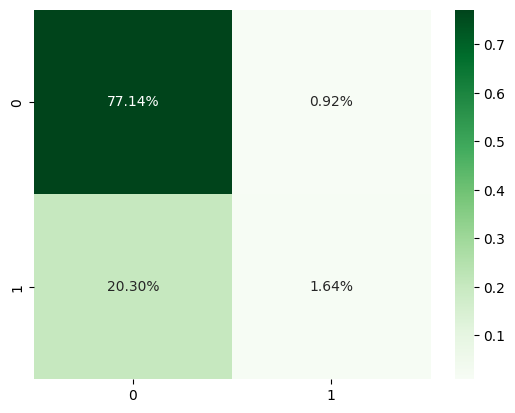

In [91]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [92]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_rf_2 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_rf_2 = accuracy_score(y_test, y_pred).round(4)
train_test_rf_2 = train_accuracy_rf_2 - test_accuracy_rf_2
precision_rf_2 = precision_score(y_test, y_pred).round(4)
recall_rf_2 = recall_score(y_test, y_pred).round(4)
f1_rf_2 = f1_score(y_test, y_pred).round(4)
roc_auc_rf_2 = roc_auc_score(y_test, y_pred).round(4)

rf_2 = [(train_accuracy_rf_2, test_accuracy_rf_2, train_test_rf_2, precision_rf_2, recall_rf_2, f1_rf_2, roc_auc_rf_2)]

rf_2_score = pd.DataFrame(data = rf_2, columns=['Train Accuracy','Test Accuracy','Difference','Precision','Recall', 'F1', "Roc_Auc"])
rf_2_score.insert(0, 'Random Forest with:', 'All Features, Tuned Model')
rf_2_score

              precision    recall  f1-score   support

          No       0.79      0.99      0.88      3996
         Yes       0.64      0.07      0.13      1123

    accuracy                           0.79      5119
   macro avg       0.72      0.53      0.51      5119
weighted avg       0.76      0.79      0.72      5119




Random Forest with:  Train Accuracy  Test Accuracy  Difference  \
0  All Features, Tuned Model          0.7938         0.7878       0.006   

   Precision  Recall     F1  Roc_Auc  
0     0.6412  0.0748  0.134   0.5315

### Random Forest 2nd Iteration Evaluation

- After tuning the model, it would appear that the train and test accuracy came much closer together, along with the precision of the model improving. However recall dropped to almost 7%, which is not good at all. I am going to proceed forward by dropping the lowest 2 scoring features, which happens to be both Sex columns, and see how the model performs from there.

### Third iteration of Random Forest with Bottom 2 Features removed based on Feature Importance, Base Parameters

In [93]:
X = feature_data.drop(['Bullied_At_School_12_mon', "Sex_Male", "Sex_Female"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)

y_train_pred = rf_class.predict(X_train)
y_pred = rf_class.predict(X_test)

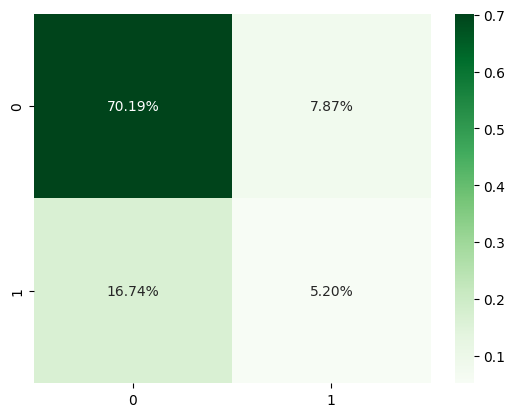

In [95]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [96]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_rf_3 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_rf_3 = accuracy_score(y_test, y_pred).round(4)
train_test_rf_3 = train_accuracy_rf_3 - test_accuracy_rf_3
precision_rf_3 = precision_score(y_test, y_pred).round(4)
recall_rf_3 = recall_score(y_test, y_pred).round(4)
f1_rf_3 = f1_score(y_test, y_pred).round(4)
roc_auc_rf_3 = roc_auc_score(y_test, y_pred).round(4)

rf_3 = [(train_accuracy_rf_3, test_accuracy_rf_3, train_test_rf_3, precision_rf_3, recall_rf_3, f1_rf_3, roc_auc_rf_3)]

rf_3_score = pd.DataFrame(data = rf_3, columns=['Train Accuracy','Test Accuracy','Difference','Precision','Recall', 'F1', "Roc_Auc"])
rf_3_score.insert(0, 'Random Forest with:', 'Removed Bottom 2 Features, Base Parameters')
rf_3_score

              precision    recall  f1-score   support

          No       0.81      0.90      0.85      3996
         Yes       0.40      0.24      0.30      1123

    accuracy                           0.75      5119
   macro avg       0.60      0.57      0.57      5119
weighted avg       0.72      0.75      0.73      5119




Random Forest with:  Train Accuracy  Test Accuracy  \
0  Removed Bottom 2 Features, Base Parameters          0.9075         0.7539   

   Difference  Precision  Recall      F1  Roc_Auc  
0      0.1536     0.3976  0.2369  0.2969    0.568

### Random Forest 3rd Iteration Evaluation

- Running the model with the two lowest scoring features removed improved on the initial model on only precision, while every other metric dropped slightly. I am moving forward with tuning this model iteration and evaluating the performance metrics from the model iteration with tuned hyperparameters.

### Fourth iteration of Random Forest with Tuned Model and Bottom 2 Features Removed

In [97]:
rf_grid_2 = GridSearchCV(rf_class, param_grid=rf_grid_search, cv=5, refit = True, verbose = 3, scoring='accuracy')
rf_grid_2.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.781 total time=   0.3s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.781 total time=   0.4s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.776 total time=   0.4s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.777 total time=   0.4s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.785 total time=   1.4s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=3)

In [98]:
rf_2_best_params = rf_grid_2.best_params_
rf_2_best_feat = rf_grid_2.best_estimator_
rf_2_average_score = "{:.3}".format(rf_grid_2.best_score_)
print(f"Best hyperparameters: {rf_2_best_params}")
print(f'Mean Accuracy: {rf_2_average_score}')

Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 100}
Mean Accuracy: 0.793


In [99]:
rf_class = RandomForestClassifier(max_depth = 5, max_features = 'log2', min_samples_leaf = 6, min_samples_split = 6,
                                  n_estimators = 100)
rf_class.fit(X_train, y_train)

y_train_pred = rf_class.predict(X_train)
y_pred = rf_class.predict(X_test)

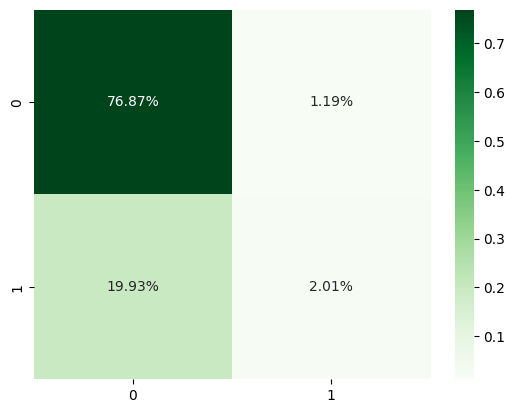

In [100]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [101]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_rf_4 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_rf_4 = accuracy_score(y_test, y_pred).round(4)
train_test_rf_4 = train_accuracy_rf_4 - test_accuracy_rf_4
precision_rf_4 = precision_score(y_test, y_pred).round(4)
recall_rf_4 = recall_score(y_test, y_pred).round(4)
f1_rf_4 = f1_score(y_test, y_pred).round(4)
roc_auc_rf_4 = roc_auc_score(y_test, y_pred).round(4)

rf_4 = [(train_accuracy_rf_4, test_accuracy_rf_4, train_test_rf_4, precision_rf_4, recall_rf_4, f1_rf_4, roc_auc_rf_4)]

rf_4_score = pd.DataFrame(data = rf_4, columns=['Train Accuracy','Test Accuracy','Difference','Precision','Recall', 'F1', "Roc_Auc"])
rf_4_score.insert(0, 'Random Forest with:', 'Removed Bottom 2 Features, Tuned Model')
rf_4_score

              precision    recall  f1-score   support

          No       0.79      0.98      0.88      3996
         Yes       0.63      0.09      0.16      1123

    accuracy                           0.79      5119
   macro avg       0.71      0.54      0.52      5119
weighted avg       0.76      0.79      0.72      5119




Random Forest with:  Train Accuracy  Test Accuracy  \
0  Removed Bottom 2 Features, Tuned Model          0.7957         0.7888   

   Difference  Precision  Recall      F1  Roc_Auc  
0      0.0069      0.628  0.0917  0.1601   0.5382

### Random Forest 4th Iteration Evaluation

- The model appears to do a better job at avoiding overfitting as much as previous models as the train and test accuracy are much closer together. The overall accuracy of the model improved by almost 3% from the model with base parameters, along with the precision improving by nearly 22%. However, what we gained in precision and overall accuracy, we lost in recall, as that dropped to nearly 9%. It appears that when tuning Random Forest, it improves model accuracy and precision, but does not perform as well on recall. I am not going to move forward with undersampling the data and seeing how that impacts model performance.

## Fifth Iteration of Random Forest with Under Sampling of Dataset, All Features

In [117]:
# Training/testing ratio was changed from 70/30 to 90/10 since there is now more data for the model, I want to give it more to train on

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [118]:
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)

y_train_pred = rf_class.predict(X_train)
y_pred = rf_class.predict(X_test)

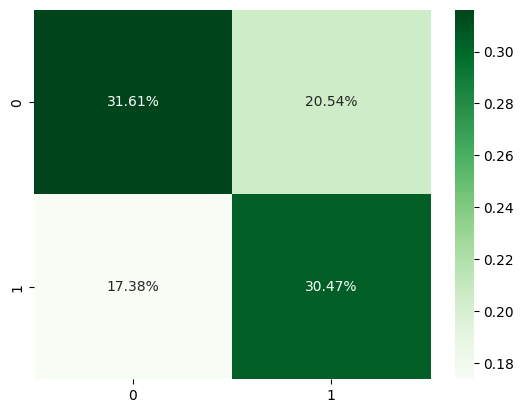

In [119]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [120]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_rf_5 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_rf_5 = accuracy_score(y_test, y_pred).round(4)
train_test_rf_5 = train_accuracy_rf_5 - test_accuracy_rf_5
precision_rf_5 = precision_score(y_test, y_pred).round(4)
recall_rf_5 = recall_score(y_test, y_pred).round(4)
f1_rf_5 = f1_score(y_test, y_pred).round(4)
roc_auc_rf_5 = roc_auc_score(y_test, y_pred).round(4)

rf_5 = [(train_accuracy_rf_5, test_accuracy_rf_5, train_test_rf_5, precision_rf_5, recall_rf_5, f1_rf_5, roc_auc_rf_5)]

rf_5_score = pd.DataFrame(data = rf_5, columns=['Train Accuracy','Test Accuracy','Difference','Precision','Recall', 'F1', "Roc_Auc"])
rf_5_score.insert(0, 'Random Forest with:', 'All Features, Under Sampling, Base Parameters')
rf_5_score

              precision    recall  f1-score   support

          No       0.65      0.61      0.63       777
         Yes       0.60      0.64      0.62       713

    accuracy                           0.62      1490
   macro avg       0.62      0.62      0.62      1490
weighted avg       0.62      0.62      0.62      1490




Random Forest with:  Train Accuracy  \
0  All Features, Under Sampling, Base Parameters          0.9051   

   Test Accuracy  Difference  Precision  Recall      F1  Roc_Auc  
0         0.6208      0.2843     0.5974  0.6367  0.6164   0.6215

### Fifth Iteration of Random Forest Assessment

- After running the model with all features and undersamplling, the model improved significantly in precision, recall, f1 and roc_auc. The train and test accuracy are 28% apart which means the model is doing pretty significant overfitting. The recall improved significantly, but the overfitting is pretty concerning. I am going to tune this model and see how it performs.

### Sixth Iteration of Random Forest, All Features, Over Sampled Minority Target Class (Yes), Tuned Model

In [106]:
rf_grid_3 = GridSearchCV(rf_class, param_grid=rf_grid_search, cv=5, refit = True, verbose = 3, scoring='accuracy')
rf_grid_3.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.634 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.651 total time=   0.3s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.652 total time=   0.2s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.661 total time=   0.2s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.668 total time=   0.2s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.637 total time=   0.5s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=3)

In [107]:
rf_3_best_params = rf_grid_3.best_params_
rf_3_best_estim = rf_grid_3.best_estimator_
rf_3_average_score = "{:.3}".format(rf_grid_3.best_score_)
print(f"Best hyperparameters: {rf_3_best_params}")
print(f'Mean Accuracy: {rf_3_average_score}')

Best hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 150}
Mean Accuracy: 0.68


In [121]:
rf_class = RandomForestClassifier(max_depth = 5, max_features = 'sqrt', min_samples_leaf = 6, min_samples_split = 6,
                                  n_estimators = 150)
rf_class.fit(X_train, y_train)

y_train_pred = rf_class.predict(X_train)
y_pred = rf_class.predict(X_test)

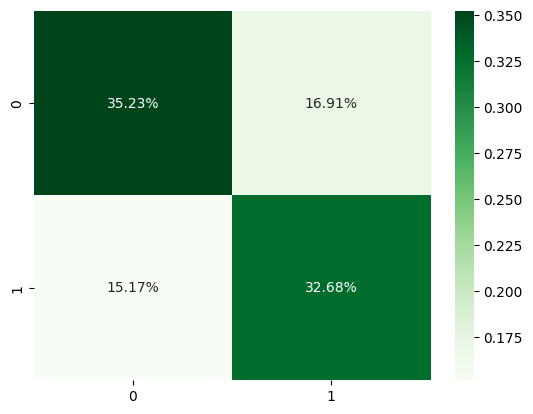

In [122]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True,
            fmt='.2%', cmap='Greens');

In [123]:
print(classification_report(y_test, y_pred, target_names=("No", "Yes")))
print()

train_accuracy_rf_6 = accuracy_score(y_train, y_train_pred).round(4)
test_accuracy_rf_6 = accuracy_score(y_test, y_pred).round(4)
train_test_rf_6 = train_accuracy_rf_6 - test_accuracy_rf_6
precision_rf_6 = precision_score(y_test, y_pred).round(4)
recall_rf_6 = recall_score(y_test, y_pred).round(4)
f1_rf_6 = f1_score(y_test, y_pred).round(4)
roc_auc_rf_6 = roc_auc_score(y_test, y_pred).round(4)

rf_6 = [(train_accuracy_rf_6, test_accuracy_rf_6, train_test_rf_6, precision_rf_6, recall_rf_6, f1_rf_6, roc_auc_rf_6)]

rf_6_score = pd.DataFrame(data = rf_6, columns=['Train Accuracy','Test Accuracy','Difference','Precision','Recall', 'F1', "Roc_Auc"])
rf_6_score.insert(0, 'Random Forest with:', 'All Features, Under Sampling, Tuned Model')
rf_6_score

              precision    recall  f1-score   support

          No       0.70      0.68      0.69       777
         Yes       0.66      0.68      0.67       713

    accuracy                           0.68      1490
   macro avg       0.68      0.68      0.68      1490
weighted avg       0.68      0.68      0.68      1490




Random Forest with:  Train Accuracy  Test Accuracy  \
0  All Features, Under Sampling, Tuned Model          0.6864         0.6792   

   Difference  Precision  Recall      F1  Roc_Auc  
0      0.0072      0.659   0.683  0.6708   0.6794

### Sixth Iteration of Random Forest Assessment

- After tuning this model, the metrics improved across all, including bringing the testing and training accuracy significantly closer together to mitigate overfitting. Recall also improved almost 5%, which is pretty significant. This appears to be the best performing model iteration out of all 12 that have been run.

## Overall Assessment of Both Logistic Regression and Random Forest

In [124]:
# Creating a dataframe that organizes all of the metrics from each iteration of the Random Forest model and sorts by the
# Accuracy score for better visualization

predictions_rf = pd.concat([rf_1_score, rf_2_score, rf_3_score, rf_4_score, rf_5_score,
                            rf_6_score], ignore_index=True, sort=False)
predictions_rf.sort_values(by=['Recall'], ascending=False)

Random Forest with:  Train Accuracy  \
5      All Features, Under Sampling, Tuned Model          0.6864   
4  All Features, Under Sampling, Base Parameters          0.9051   
0                  All Features, Base Parameters          0.9247   
2     Removed Bottom 2 Features, Base Parameters          0.9075   
3         Removed Bottom 2 Features, Tuned Model          0.7957   
1                      All Features, Tuned Model          0.7938   

   Test Accuracy  Difference  Precision  Recall      F1  Roc_Auc  
5         0.6792      0.0072     0.6590  0.6830  0.6708   0.6794  
4         0.6208      0.2843     0.5974  0.6367  0.6164   0.6215  
0         0.7531      0.1716     0.3968  0.2413  0.3001   0.5691  
2         0.7539      0.1536     0.3976  0.2369  0.2969   0.5680  
3         0.7888      0.0069     0.6280  0.0917  0.1601   0.5382  
1         0.7878      0.0060     0.6412  0.0748  0.1340   0.5315

In [125]:
predictions_lr.sort_values(by=['Recall'], ascending=False)

Logistic Regression with:  Train Accuracy  \
4  All Features, Base Parameters, Undersampling          0.6734   
5      All Features, Tuned Model, Undersampling          0.6734   
0                 All Features, Base Parameters          0.7911   
2    Bottom 2 Features Removed, Base Parameters          0.7892   
1                     All Features, Tuned Model          0.7905   
3        Bottom 2 Features Removed, Tuned Model          0.7896   

   Test Accuracy  Difference  Precision  Recall      F1  Roc_Auc  
4         0.6678      0.0056     0.6698  0.6031  0.6347   0.6651  
5         0.6678      0.0056     0.6698  0.6031  0.6347   0.6651  
0         0.7912     -0.0001     0.5785  0.1772  0.2713   0.5705  
2         0.7859      0.0033     0.5429  0.1523  0.2378   0.5581  
1         0.7912     -0.0007     0.6089  0.1345  0.2203   0.5551  
3         0.7880      0.0016     0.5848  0.1167  0.1945   0.5467

- My initial hypothesis was that a Logistic Regression model would be best to use on this data and would be the best performing model. After doing multiple iterations of both a Logisitc Regression and Random Forest, the best model performance across the board was the tuned Random Forest model with under sampling the minority class in the dataset, to help the model learn equally between the No and Yes classes.  I thought about oversampling to give the model more to learn from, I felt like it would skew results by creating data that was not naturally gathered like the initial dataset. While it did not have the highest scoring test accuracy (ended up being about middle of the pack between all model iterations), it had the highest scoring Precision, Recall, F1 and Roc_Auc scores. My concern with other models is that even though the overall accuracy was better, their ability to be precise and recall Yes classes was significantly poorer, and I cannot put a model into production performing that poorly. While this model is not at an optimal level, it is in my opinion the model far outperforming any other iteration that was conducted.
</br>
</br>
- With more time, I'd like to do more exploration of the data, more manipulation of the features to determine if that could positively impact the model's performance. The only model iteration that could be overfitting is the Random Forest with all features and base parameters due to the fact it had the largest accuracy difference between the training set and testing set. I wanted to ensure that I could see how each model iteration was performing differently on the training data to get a better evaluation of each model's performance.
</br>
</br>
- One last point I would like to make. Considering that the Yes class was the minority, which is the class I value more in being able to predict, it would be a good approach to gather more data to be able to have a larger, natural representation of each class so the model has far more data to learn from. While I chose a model that utilized under sampling in order to bring the target classes into balance, it is not an ideal approach. It leaves more to be desired with overall accuracy and recall, but it does not appear to be overfitting and it has the highest recall, which is what I value most with this particular project.

## Saving Best Model

In [114]:
import pickle

In [115]:
filename = 'term_project_best_model.sav'
pickle.dump(rf_class, open(filename, 'wb'))